In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib


/tmp/ipykernel_2413694/3589217045.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from latexify import latexify, format_axes

In [4]:
latexify()

NameError: name 'format_axes' is not defined

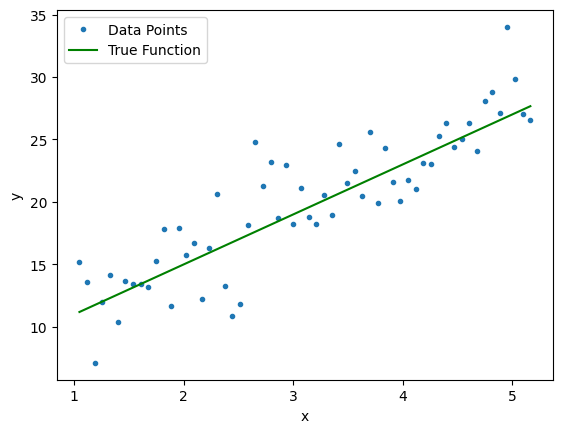

In [2]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,300,4)])
np.random.seed(10)  #Setting seed for reproducability
y = 4*x + 7 + np.random.normal(0,3,len(x))
y_true = 4*x + 7
max_deg = 20
data_x = [x**(i+1) for i in range(max_deg)] + [y]
data_c = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
data = pd.DataFrame(np.column_stack(data_x),columns=data_c)
data["ones"] = 1
plt.plot(data['x'],data['y'],'.', label='Data Points')
plt.plot(data['x'], y_true,'g', label='True Function')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
format_axes(plt.gca())
plt.savefig('lin_1.pdf', transparent=True, bbox_inches="tight")

(60, 1)
(60, 2)
(60, 3)
(60, 4)
(60, 5)
(60, 6)
(60, 7)
(60, 8)
(60, 10)
(60, 12)
(60, 15)
(60, 20)
(60, 25)


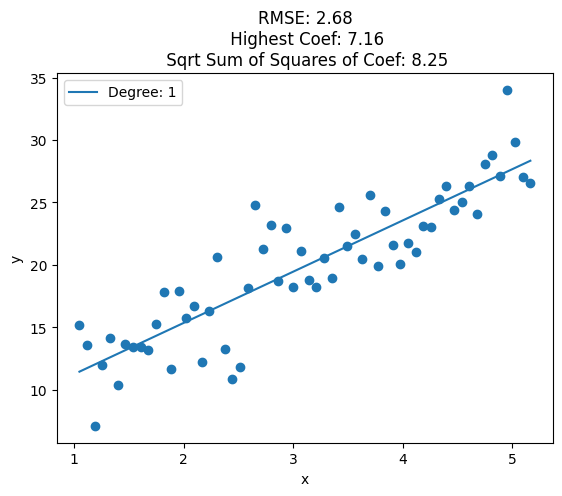

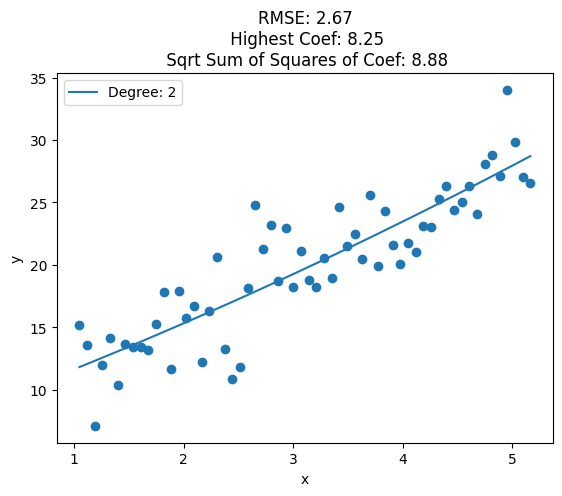

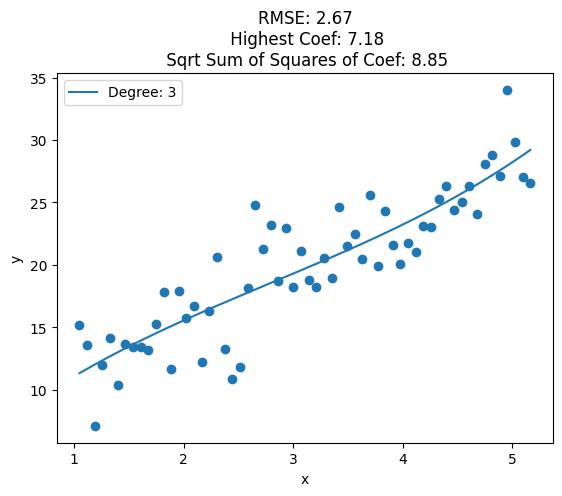

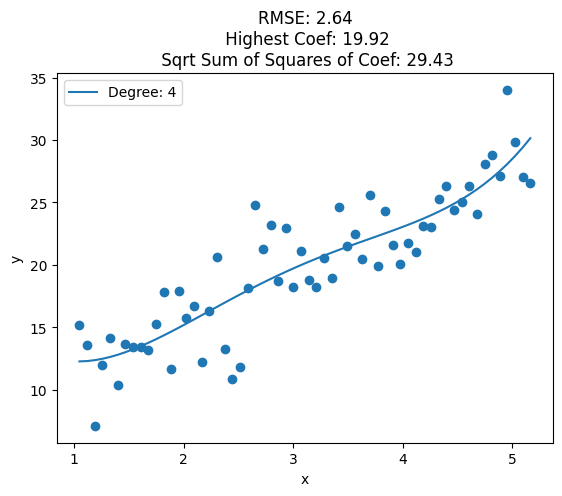

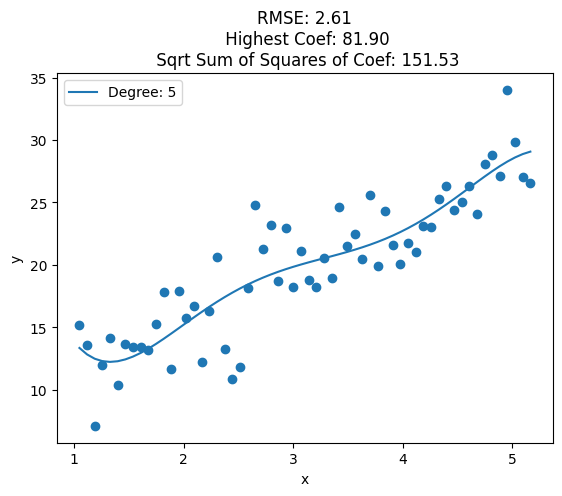

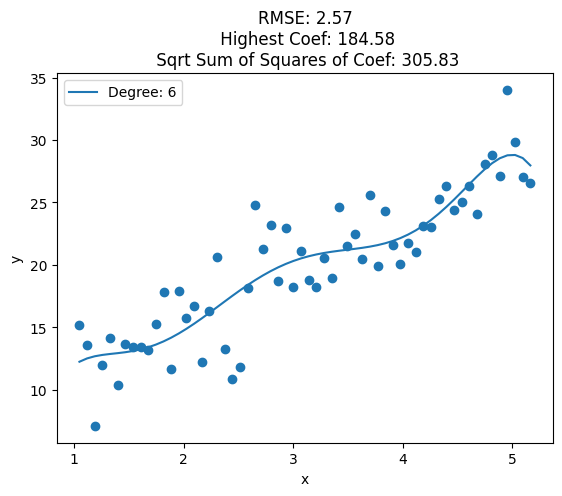

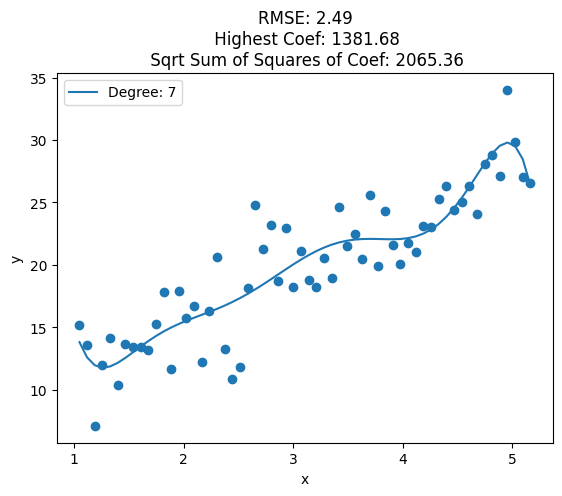

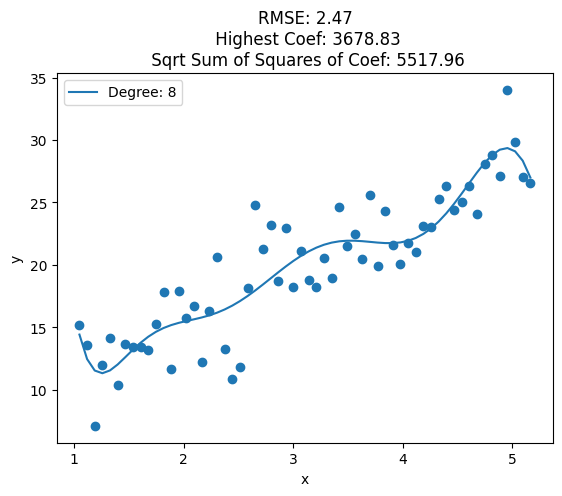

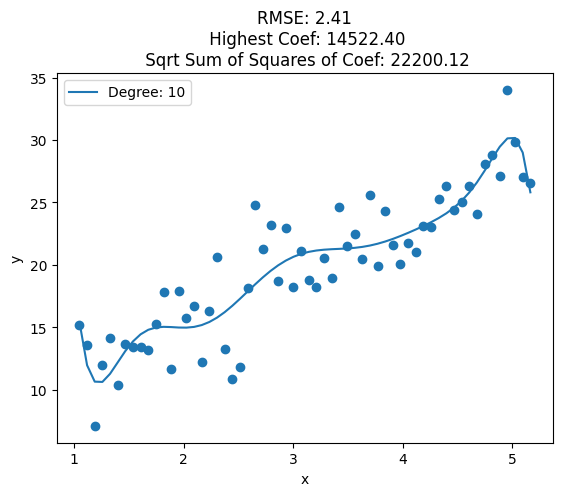

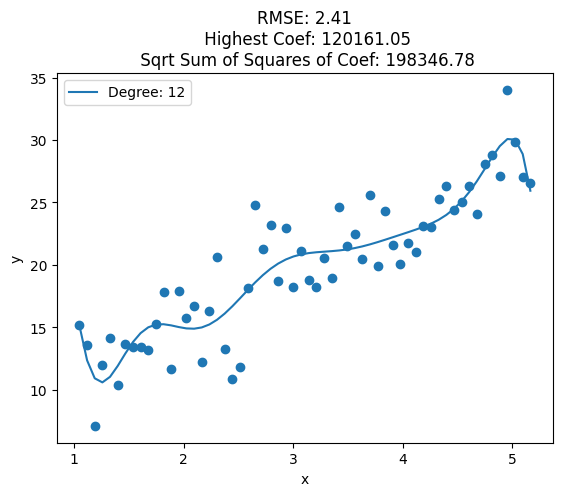

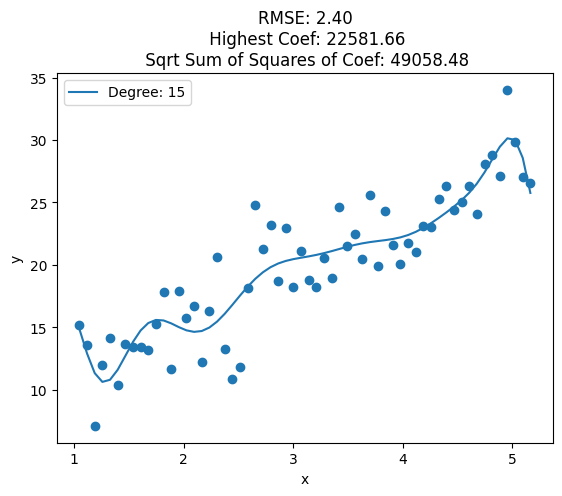

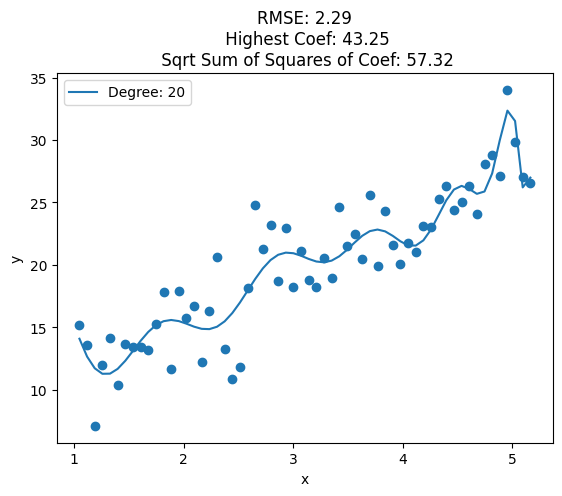

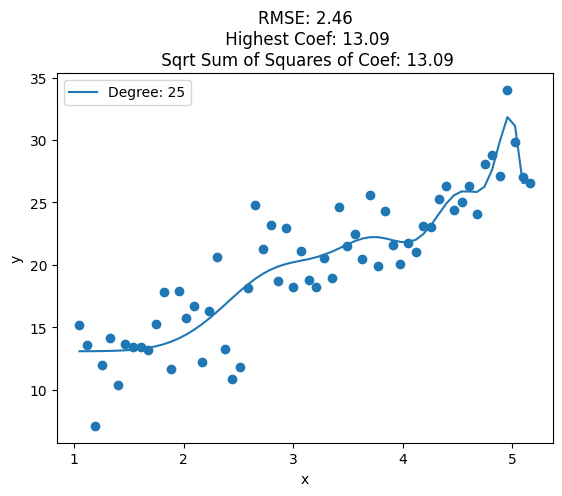

In [23]:
from sklearn.preprocessing import PolynomialFeatures
for i, deg in enumerate([1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 15, 20, 25]):
    poly = PolynomialFeatures(degree=deg, include_bias=False)
    X_ = poly.fit_transform(x.reshape(-1, 1))
    from sklearn.linear_model import LinearRegression
    clf = LinearRegression()
    clf.fit(X_, data['y'])
    print(X_.shape)
    y_pred = clf.predict(X_)
    plt.figure()
    plt.plot(data['x'], y_pred, label='Degree: {}'.format(deg))
    plt.xlabel("x")
    plt.ylabel("y")
    plt.scatter(x, y)
    plt.legend()
    train_rmse = np.sqrt(np.mean((y_pred - y)**2))
    highest_coef = np.max([np.max(clf.coef_), clf.intercept_])
    sqrt_sum_squares_coef = np.sqrt(np.sum(clf.coef_**2) + clf.intercept_**2)
    plt.title('RMSE: {:.2f}\n Highest Coef: {:.2f}\n Sqrt Sum of Squares of Coef: {:.2f}'.format(train_rmse, highest_coef, sqrt_sum_squares_coef))
    #format_axes(plt.gca())
    #plt.savefig('lin_{}.pdf'.format(i+2), transparent=True, bbox_inches="tight")

In [6]:
from sklearn.linear_model import LinearRegression
coef_list = []
for i,deg in enumerate([1,3,6,11]):
    predictors = ['ones','x']
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    regressor = LinearRegression(normalize=False, fit_intercept=False)  
    regressor.fit(data[predictors],data['y'])
    y_pred = regressor.predict(data[predictors])
    coef_list.append(abs(max(regressor.coef_, key=abs)))

    plt.scatter(data['x'],data['y'], label='Train')
    plt.plot(data['x'], y_pred,'k', label='Prediction')
    plt.plot(data['x'], y_true,'g.', label='True Function')
    format_axes(plt.gca())
    plt.legend() 
    plt.title(f"Degree: {deg} | Max Coeff: {max(regressor.coef_, key=abs):.2f}")
    plt.savefig('lin_plot_{}.pdf'.format(deg), transparent=True, bbox_inches="tight")
    plt.clf()

<Figure size 244.08x150.85 with 0 Axes>

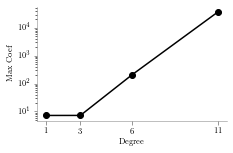

In [7]:
plt.semilogy([1,3,6,11],coef_list,'o-k')
plt.xticks([1,3,6,11])
plt.xlabel('Degree')
plt.ylabel('Max Coef')
format_axes(plt.gca())
plt.savefig('lin_plot_coef.pdf', transparent=True, bbox_inches="tight")

In [8]:
def cost(theta_0, theta_1, x, y):
    s = 0
    for i in range(len(x)):
        y_i_hat = x[i]*theta_1 + theta_0
        s += (y[i]-y_i_hat)**2
    return s/len(x)

x_grid, y_grid = np.mgrid[-4:15:.2, -4:15:.2]

cost_matrix = np.zeros_like(x_grid)
for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        cost_matrix[i, j] = cost(x_grid[i, j], y_grid[i, j], data['x'], data['y'])

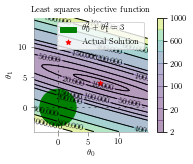

In [9]:
from matplotlib.patches import Circle

levels = np.sort(np.array([2,10,20,50,100,150,200,400,600,800,1000]))

plt.contourf(x_grid, y_grid, cost_matrix, levels,alpha=.4)
plt.colorbar()
plt.axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
plt.axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)

CS = plt.contour(x_grid, y_grid, cost_matrix, levels, linewidths=1,colors='black')
plt.clabel(CS, inline=1, fontsize=8)
plt.title("Least squares objective function")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
p1 = Circle((0, 0), 3, color='g', label=r'$\theta_0^2+\theta_1^2=3$')
plt.scatter([7], [4],marker='*', color='r',s=25,label='Actual Solution')
plt.gca().add_patch(p1)
plt.legend()
plt.gca().set_aspect('equal')
format_axes(plt.gca())
plt.savefig('ridge_base_contour.pdf', transparent=True, bbox_inches="tight")
plt.show()

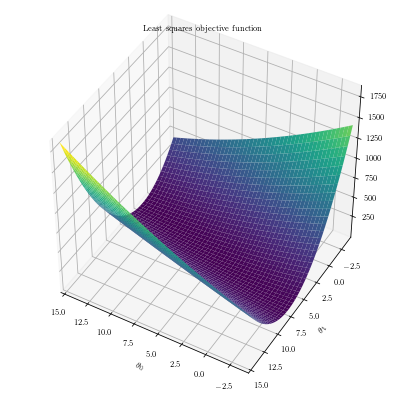

In [10]:
fig = plt.figure(figsize=(7,7))
ax = plt.axes(projection='3d')

ax = plt.axes(projection='3d')
ax.plot_surface(x_grid, y_grid, cost_matrix,cmap='viridis', edgecolor='none')
ax.set_title('Least squares objective function');
ax.set_xlabel(r"$\theta_0$")
ax.set_ylabel(r"$\theta_1$")
ax.set_xlim([-4,15])
ax.set_ylim([-4,15])

u = np.linspace(0, np.pi, 30)
v = np.linspace(0, 2 * np.pi, 30)

# x = np.outer(500*np.sin(u), np.sin(v))
# y = np.outer(500*np.sin(u), np.cos(v))
# z = np.outer(500*np.cos(u), np.ones_like(v))
# ax.plot_wireframe(x, y, z)

ax.view_init(45, 120)
plt.savefig('ridge_base_surface.pdf', transparent=True, bbox_inches="tight")

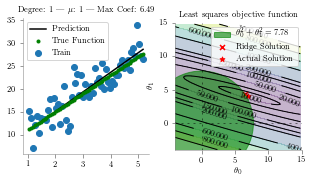

<Figure size 360x180 with 0 Axes>

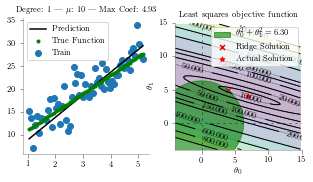

<Figure size 360x180 with 0 Axes>

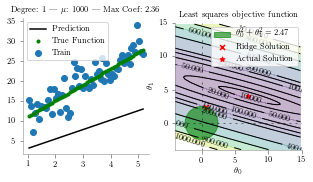

<Figure size 360x180 with 0 Axes>

In [11]:
latexify(fig_width=5, fig_height=2.5)
from sklearn.linear_model import Ridge

for alpha in [1, 10, 1000]:
    fig, ax = plt.subplots(nrows=1, ncols=2)
    
    deg = 1
    predictors = ['ones','x']
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    regressor = Ridge(alpha=alpha,normalize=True, fit_intercept=False)
    regressor.fit(data[predictors],data['y'])
    y_pred = regressor.predict(data[predictors])
    format_axes(ax[0])
    format_axes(ax[1])
    # Plot
    ax[0].scatter(data['x'],data['y'], label='Train')
    ax[0].plot(data['x'], y_pred,'k', label='Prediction')
    ax[0].plot(data['x'], y_true,'g.', label='True Function')
    ax[0].legend() 
    ax[0].set_title(f"Degree: {deg} | $\mu$: {alpha} | Max Coef: {max(regressor.coef_, key=abs):.2f}")

    # Circle
    p1 = Circle((0, 0), np.sqrt(regressor.coef_.T@regressor.coef_), alpha=0.6, color='g', label=r'$\theta_0^2+\theta_1^2={:.2f}$'.format(np.sqrt(regressor.coef_.T@regressor.coef_)))
    ax[1].add_patch(p1)

    # Contour
    levels = np.sort(np.array([2,10,20,50,100,150,200,400,600,800,1000]))
    ax[1].contourf(x_grid, y_grid, cost_matrix, levels,alpha=.3)
    #ax[1].colorbar()
    ax[1].axhline(0, color='black', alpha=.5, dashes=[2, 4],linewidth=1)
    ax[1].axvline(0, color='black', alpha=0.5, dashes=[2, 4],linewidth=1)

    CS = plt.contour(x_grid, y_grid, cost_matrix, levels, linewidths=1,colors='black')
    ax[1].clabel(CS, inline=1, fontsize=8)
    ax[1].set_title("Least squares objective function")
    ax[1].set_xlabel(r"$\theta_0$")
    ax[1].set_ylabel(r"$\theta_1$")
    ax[1].scatter(regressor.coef_[0],regressor.coef_[1] ,marker='x', color='r',s=25,label='Ridge Solution')
    ax[1].scatter([7], [4],marker='*', color='r',s=25,label='Actual Solution')
    ax[1].set_xlim([-4,15])
    ax[1].set_ylim([-4,15])
    ax[1].legend()
    ax[1].set_aspect('equal')
    plt.savefig('ridge_{}.pdf'.format(alpha), transparent=True, bbox_inches="tight")
    plt.show()
    plt.clf()

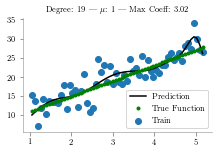

/Users/nipun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.62699e-21): result may not be accurate.
  overwrite_a=True).T


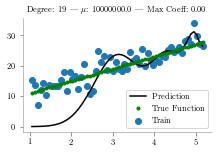

<Figure size 244.08x150.85 with 0 Axes>

In [12]:
latexify()
from sklearn.linear_model import Ridge

for i,deg in enumerate([19]):
    predictors = ['ones', 'x']
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    for i,alpha in enumerate([1, 1e7]):
        regressor = Ridge(alpha=alpha,normalize=False, fit_intercept=False)
        regressor.fit(data[predictors],data['y'])
        y_pred = regressor.predict(data[predictors])
        plt.scatter(data['x'],data['y'], label='Train')
        plt.plot(data['x'], y_pred,'k', label='Prediction')
        plt.plot(data['x'], y_true,'g.', label='True Function')
        plt.legend() 
        format_axes(plt.gca())
        plt.title(f"Degree: {deg} | $\mu$: {alpha} | Max Coeff: {max(regressor.coef_, key=abs):.2f}")
        plt.savefig('ridge_{}_{}.pdf'.format(alpha, deg), transparent=True, bbox_inches="tight")
        plt.show()
        plt.clf()

In [13]:
# from sklearn.linear_model import Ridge

# for i,deg in enumerate([2,4,8,16]):
#   predictors = ['x']
#   if deg >= 2:
#     predictors.extend(['x_%d'%i for i in range(2,deg+1)])  
#   fig, ax = plt.subplots(nrows=1, ncols=4, sharey=True, figsize=(20, 4))

#   for i,alpha in enumerate([1e-15,1e-4,1,20]):
#     regressor = Ridge(alpha=alpha,normalize=True)
#     regressor.fit(data[predictors],data['y'])
#     y_pred = regressor.predict(data[predictors])
#     ax[i].scatter(data['x'],data['y'], label='Train')
#     ax[i].plot(data['x'], y_pred,'k', label='Prediction')
#     ax[i].plot(data['x'], y_true,'g.', label='True Function')
#     ax[i].legend() 
#     ax[i].set_title(f"Degree: {deg} | Alpha: {alpha} | Max Coeff: {max(regressor.coef_, key=abs):.2f}")

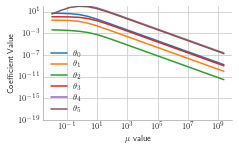

In [29]:
import pandas as pd

data = pd.read_excel("data.xlsx")
cols = data.columns
alph_list = np.logspace(-2,10,num=20, endpoint=False)
coef_list = []

for i,alpha in enumerate(alph_list):
    regressor = Ridge(alpha=alpha,normalize=True)
    regressor.fit(data[cols[1:-1]],data[cols[-1]])
    coef_list.append(regressor.coef_)

coef_list = np.abs(np.array(coef_list).T)
for i in range(len(cols[1:-1])):
    plt.loglog(alph_list, coef_list[i] , label=r"$\theta_{}$".format(i))
plt.xlabel('$\mu$ value')
plt.ylabel('Coefficient Value')
plt.legend() 
format_axes(plt.gca())

lim = True
if lim:
    plt.ylim((10e-20, 100))
    plt.savefig('rid_reg-without-lim.pdf', transparent=True, bbox_inches="tight")
else:
    plt.savefig('rid_reg-with-lim.pdf', transparent=True, bbox_inches="tight")

# plt.set_title(f"Degree: {deg} | Alpha: {alpha} | Max Coeff: {max(regressor.coef_, key=abs):.2f}")

### Question

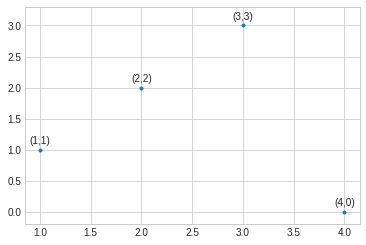

In [4]:
plt.style.use('seaborn-whitegrid')

x = [1,2,3,4]
y = [1,2,3,0]
y_1 = [(2-i/5) for i in x]
y_2 = [(0.5+0.4*i) for i in x]
plt.ylim(-0.2,3.3)
plt.plot(x,y,'.')
for i in range(len(x)):
    plt.text(x[i]-0.1, y[i]+0.1, "({},{})".format(x[i], y[i]))
#plt.plot(x,y_1, label="unreg")
#plt.plot(x,y_2, label="reg")
#plt.legend()
#format_axes(plt.gca())
plt.savefig('temp.pdf', transparent=True)

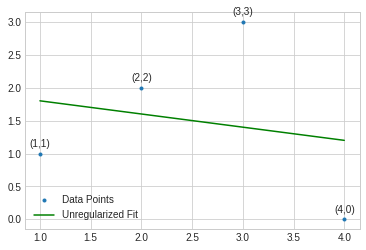

In [5]:
from sklearn.linear_model import LinearRegression
x_new = np.vstack([np.ones_like(x), x]).T
regressor = LinearRegression(normalize=False, fit_intercept=False)  
regressor.fit(x_new,y)
y_pred = regressor.predict(x_new)

for i in range(len(x)):
    plt.text(x[i]-0.1, y[i]+0.1, "({},{})".format(x[i], y[i]))
plt.plot(x,y,'.', label='Data Points')
plt.plot(x,y_pred,'-g', label='Unregularized Fit')
plt.legend(loc='lower left')
#format_axes(plt.gca())
plt.savefig('q_unreg.pdf', transparent=True)

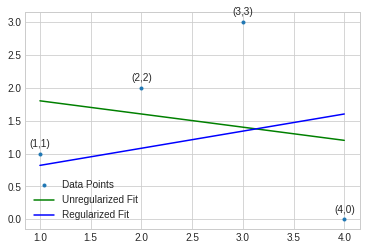

In [10]:
from sklearn.linear_model import Ridge

regressor = Ridge(alpha=4, normalize=False, fit_intercept=False)  
regressor.fit(x_new,y)
y_pred_r = regressor.predict(x_new)

for i in range(len(x)):
    plt.text(x[i]-0.1, y[i]+0.1, "({},{})".format(x[i], y[i]))
def ridge_func(x):
    return 0.56 + 0.26*np.array(x)
plt.plot(x,y,'.', label='Data Points')
plt.plot(x,y_pred,'-g', label='Unregularized Fit')
plt.plot(x,ridge_func(x),'-b', label='Regularized Fit')
plt.legend(loc='lower left')
#format_axes(plt.gca())
plt.savefig('q_reg.pdf', transparent=True)

In [11]:
regressor.coef_

array([0.37209302, 0.30232558])

### Retrying with a better example

In [14]:
np.linalg.inv([[4, 10], [10, 34]])@np.array([6, 14])

array([ 1.77777778, -0.11111111])

In [13]:
np.linalg.inv([[8, 10], [10, 34]])@np.array([6, 14])

array([0.37209302, 0.30232558])

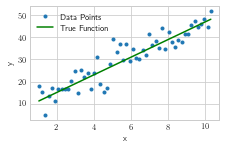

In [18]:
#Define input array with angles from 60deg to 300deg converted to radians
x = np.array([i*np.pi/180 for i in range(60,600,10)])
np.random.seed(10)  #Setting seed for reproducability
y = 4*x + 7 + np.random.normal(0,5,len(x))
y_true = 4*x + 7
max_deg = 20
data_x = [x**(i+1) for i in range(max_deg)] + [y]
data_c = ['x'] + ['x_{}'.format(i+1) for i in range(1,max_deg)] + ['y']
data = pd.DataFrame(np.column_stack(data_x),columns=data_c)
data["ones"] = 1
plt.plot(data['x'],data['y'],'.', label='Data Points')
plt.plot(data['x'], y_true,'g', label='True Function')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
#format_axes(plt.gca())
plt.savefig('lin_1.pdf', transparent=True, bbox_inches="tight")

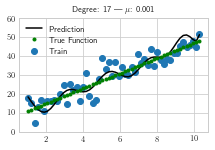

/Users/nipun/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.11479e-28): result may not be accurate.
  overwrite_a=True).T


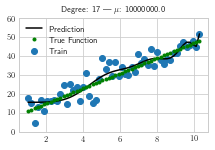

<Figure size 244.08x150.85 with 0 Axes>

In [19]:
from sklearn.linear_model import Ridge

for i,deg in enumerate([17]):
    predictors = ['ones', 'x']
    if deg >= 2:
        predictors.extend(['x_%d'%i for i in range(2,deg+1)])  

    for i,alpha in enumerate([1e-3, 1e7]):
        regressor = Ridge(alpha=alpha,normalize=False)
        regressor.fit(data[predictors],data['y'])
        y_pred = regressor.predict(data[predictors])
        plt.scatter(data['x'],data['y'], label='Train')
        plt.plot(data['x'], y_pred,'k', label='Prediction')
        plt.plot(data['x'], y_true,'g.', label='True Function')
        plt.legend() 
        #format_axes(plt.gca())
        #print(regressor.coef_)
        plt.ylim([0,60])
        plt.title(f"Degree: {deg} | $\mu$: {alpha}")
        plt.savefig('ridge_new_{}_{}.pdf'.format(i, deg), transparent=True, bbox_inches="tight")
        plt.show()
        plt.clf()